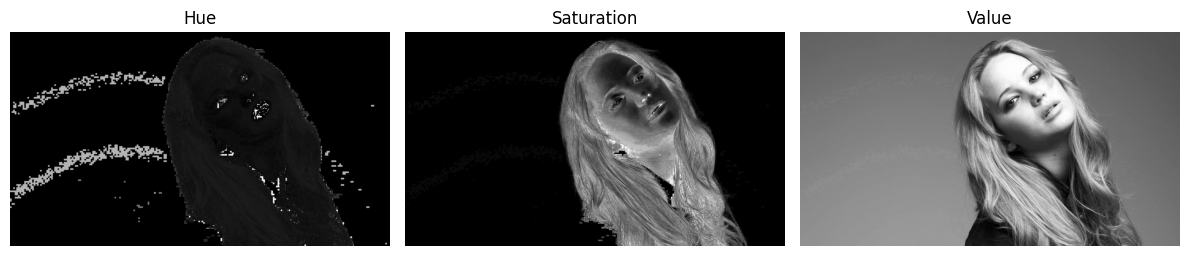

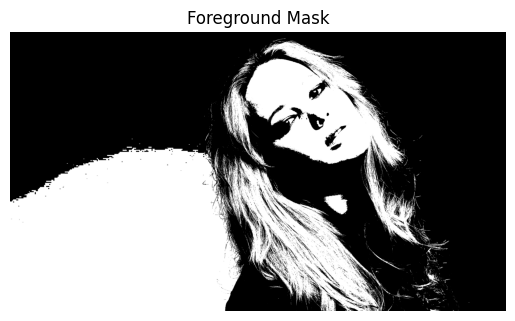

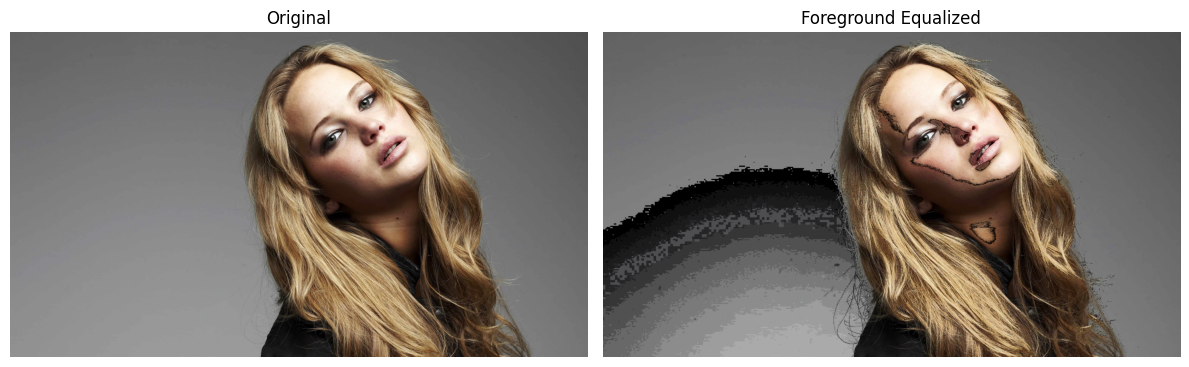

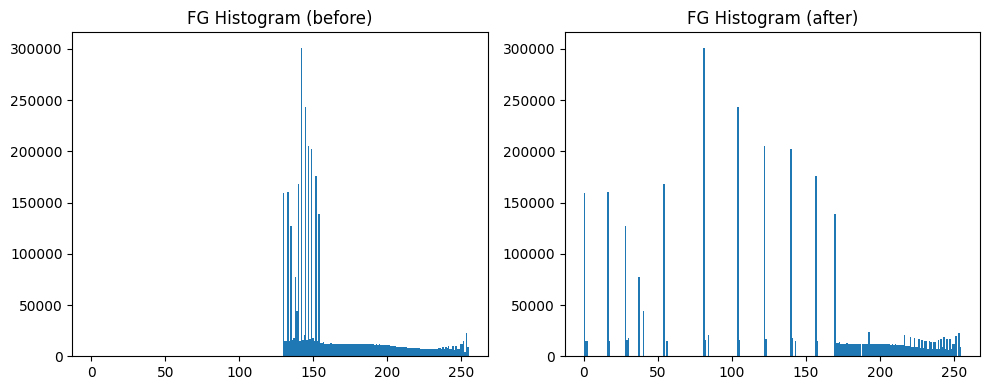

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG = "jeniffer.jpg"         
bgr = cv2.imread(IMG)
if bgr is None:
    raise FileNotFoundError(IMG)

hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv)

plt.figure(figsize=(12,4))
for i, (t, ch) in enumerate(zip(["Hue", "Saturation", "Value"], [H, S, V])):
    plt.subplot(1,3,i+1)
    plt.imshow(ch, cmap="gray")
    plt.title(t)
    plt.axis("off")
plt.tight_layout(); plt.show()



_, mask = cv2.threshold(V, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # 255=foreground

plt.figure(); plt.imshow(mask, cmap="gray"); plt.title("Foreground Mask"); plt.axis("off"); plt.show()

V_fg = cv2.bitwise_and(V, V, mask=mask)             
vals_fg = V_fg[V_fg > 0]                              
hist, _ = np.histogram(vals_fg, bins=256, range=(0,255))

cdf = np.cumsum(hist)
cdf_min = cdf[np.nonzero(cdf)][0] if np.any(cdf) else 0
N = int(vals_fg.size)
L = 256

if N > 0:
    denom = max(1, N - cdf_min)
    lut = np.round((cdf - cdf_min) / denom * (L - 1)).clip(0, 255).astype(np.uint8)
else:
    lut = np.arange(256, dtype=np.uint8)

V_eq_all = lut[V]                                     
V_fg_eq  = cv2.bitwise_and(V_eq_all, V_eq_all, mask=mask)  

mask_inv = cv2.bitwise_not(mask)
V_bg = cv2.bitwise_and(V, V, mask=mask_inv)           
V_out = cv2.add(V_fg_eq, V_bg)                      

bgr_out = cv2.cvtColor(cv2.merge([H, S, V_out]), cv2.COLOR_HSV2BGR)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(bgr_out, cv2.COLOR_BGR2RGB)); plt.title("Foreground Equalized"); plt.axis("off")
plt.tight_layout(); plt.show()

vals_fg_after = V_out[mask == 255]
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.hist(vals_fg, bins=256, range=(0,255)); plt.title("FG Histogram (before)")
plt.subplot(1,2,2); plt.hist(vals_fg_after, bins=256, range=(0,255)); plt.title("FG Histogram (after)")
plt.tight_layout(); plt.show()
